## Import basic libraries ##

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import Machine Learning Libraries ##

In [48]:
from sklearn.model_selection import train_test_split

## Getting the data ##

Please for details of the datasets read the README file inside the data folder. In the datasets the target is defined as "target" which can be either '0' or '1'. '1' implies that the song has featured in the weekly list (Issued by Billboards) of Hot-100 tracks in that decade at least once and is therefore a 'hit'. '0' Implies that the track is a 'flop'.

In [49]:
#We use list comprehension to add all the dataset files into one list called "data". 
data = [pd.read_csv(f'data/dataset-of-{decade}0s.csv') for decade in ['6', '7', '8', '9', '0', '1']]

In [50]:
# Add a new column called "decade" to each of the dataset of the list and save them as a pd series
for i, decade in enumerate([1960, 1970, 1980, 1990, 2000, 2010]):
    data[i]['decade'] = pd.Series(decade, index=data[i].index)

In [51]:
#We concatenate randomly (through the sample function) the rows of the dataset list into a one main dataframe. frac=1.0 means considers 100% of the rows.
data = pd.concat(data, axis=0).sample(frac=1.0, random_state=1).reset_index(drop=True)

In [52]:
#chcking shape of the data
data.shape

(41106, 20)

In [53]:
#checking the first 5 rows
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
0,Attaining - Take 1 / Alternate Version,John Coltrane,spotify:track:3EwLV5hZqLKx5e0Lp1QcB7,0.342,0.462,4,-12.931,0,0.0389,0.51400,0.018100,0.0977,0.397,98.466,816867,4,24.84938,33,0,1970
1,So Fly,NB Ridaz Featuring Gemini,spotify:track:2BjIi07kN0yKSur0Fwrnss,0.861,0.519,2,-6.404,1,0.1120,0.13600,0.000000,0.1230,0.519,81.966,254533,4,50.03590,11,1,2000
2,Because I Got It Like That,Jungle Brothers,spotify:track:5unLExF3iiG3YkU11u6wFO,0.900,0.916,1,-7.481,0,0.1150,0.22000,0.000141,0.0323,0.538,102.916,277894,4,24.71271,16,0,1980
3,Babylon a Fall - Remastered,Yabby You,spotify:track:6xfe0G2HwRDQaChxkzvNKw,0.714,0.301,2,-14.800,1,0.1230,0.15600,0.661000,0.2290,0.651,74.856,357671,4,104.64231,11,0,1970
4,Fins,Jimmy Buffett,spotify:track:4h0gZ422QxBRdTV14u0P8y,0.661,0.645,4,-13.520,1,0.0487,0.00895,0.000000,0.0362,0.930,136.693,204640,4,31.99617,10,1,1970


In [54]:
#getting general info of the data. We see there are no missing values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41106 entries, 0 to 41105
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             41106 non-null  object 
 1   artist            41106 non-null  object 
 2   uri               41106 non-null  object 
 3   danceability      41106 non-null  float64
 4   energy            41106 non-null  float64
 5   key               41106 non-null  int64  
 6   loudness          41106 non-null  float64
 7   mode              41106 non-null  int64  
 8   speechiness       41106 non-null  float64
 9   acousticness      41106 non-null  float64
 10  instrumentalness  41106 non-null  float64
 11  liveness          41106 non-null  float64
 12  valence           41106 non-null  float64
 13  tempo             41106 non-null  float64
 14  duration_ms       41106 non-null  int64  
 15  time_signature    41106 non-null  int64  
 16  chorus_hit        41106 non-null  float6

### Splitting the data ###

In [55]:
#dividing data for training and testing
df_train, df_test = train_test_split(data, train_size=0.8, random_state=42)

In [56]:
# checking the shape of training and testing data
print(df_train.shape, df_test.shape)

(32884, 20) (8222, 20)


## EDA ##

### Correlation analysis ###

In [57]:
#Analysing correlation. Getting rid of not relevant categorical data and calculate a correlation table between the features
df_train_corr = data.drop(['track', 'artist', 'uri'], axis=1)
df_train_corr.corr().T

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,decade
danceability,1.000000,0.206128,0.015433,0.274160,-0.032743,0.156452,-0.261252,-0.301915,-0.115251,0.553858,-0.066541,-0.063030,0.191664,-0.036277,-0.058615,3.460966e-01,1.303271e-01
energy,0.206128,1.000000,0.022523,0.772628,-0.033780,0.122430,-0.715088,-0.208153,0.157779,0.341427,0.224018,0.011830,0.196072,0.009620,-0.040233,1.771423e-01,3.243404e-01
key,0.015433,0.022523,1.000000,0.008438,-0.140455,0.026515,-0.024178,-0.013101,0.000668,0.007742,0.001154,0.015493,0.004757,0.010264,0.006784,9.882525e-03,1.874165e-02
loudness,0.274160,0.772628,0.008438,1.000000,0.000509,0.069241,-0.566548,-0.374301,0.086708,0.271775,0.169453,-0.049890,0.165520,-0.013401,-0.080065,2.860341e-01,3.299264e-01
mode,-0.032743,-0.033780,-0.140455,0.000509,1.000000,-0.059636,0.049961,-0.075992,0.008886,0.035636,0.027053,-0.074828,-0.009483,-0.022594,-0.057095,7.961369e-02,-8.792029e-02
speechiness,0.156452,0.122430,0.026515,0.069241,-0.059636,1.000000,-0.083948,-0.084092,0.131488,0.001528,0.036854,0.007631,0.021085,0.012972,-0.008636,-4.083547e-02,1.585626e-01
acousticness,-0.261252,-0.715088,-0.024178,-0.566548,0.049961,-0.083948,1.000000,0.204137,-0.030765,-0.195331,-0.179700,-0.070271,-0.188139,-0.012409,-0.016824,-2.460359e-01,-4.053626e-01
instrumentalness,-0.301915,-0.208153,-0.013101,-0.374301,-0.075992,-0.084092,0.204137,1.000000,-0.050582,-0.287047,-0.053618,0.106551,-0.077980,0.048654,0.081188,-4.076382e-01,9.871800e-03
liveness,-0.115251,0.157779,0.000668,0.086708,0.008886,0.131488,-0.030765,-0.050582,1.000000,0.000784,0.024861,0.005336,0.004773,0.037981,-0.011742,-5.144505e-02,-3.006675e-02
valence,0.553858,0.341427,0.007742,0.271775,0.035636,0.001528,-0.195331,-0.287047,0.000784,1.000000,0.107901,-0.172166,0.155669,-0.059120,-0.133527,2.511466e-01,-1.875906e-01


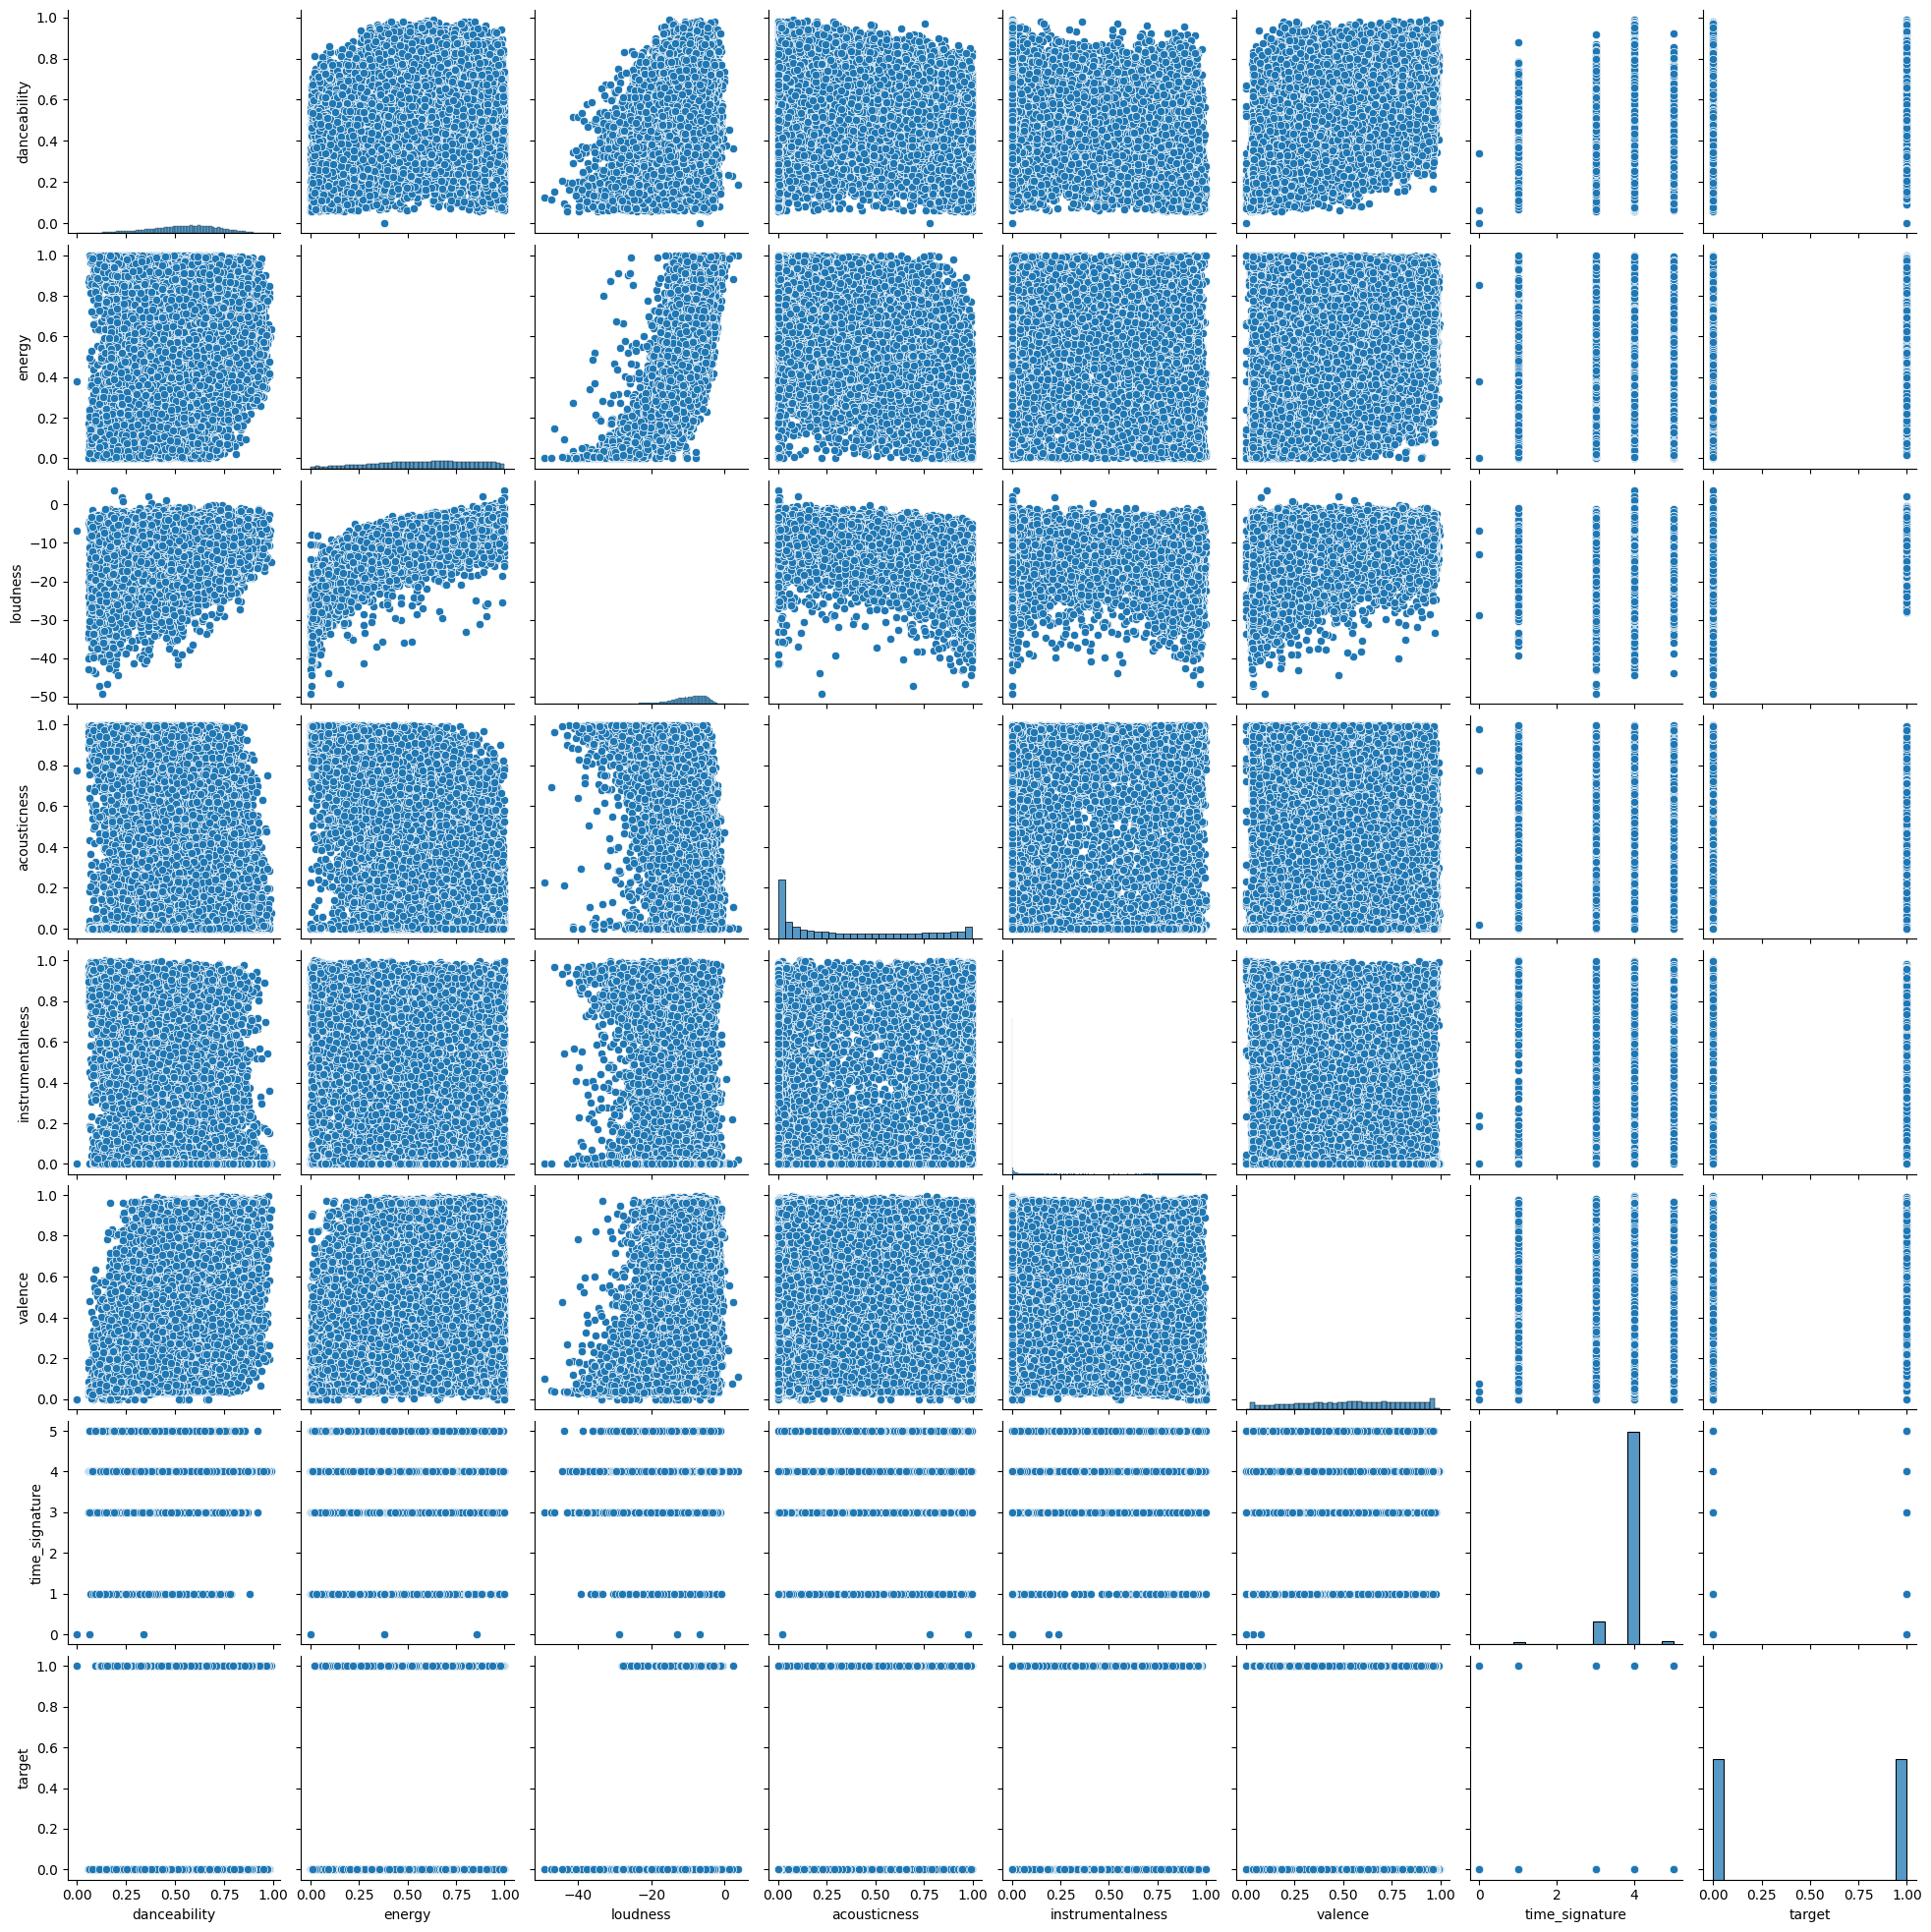

In [58]:
# getting rid of less correlated features (according to the previous table) and plotting pair plots
df_train_corr = df_train_corr.drop(['key', 'mode', 'speechiness', 'liveness', 'tempo', 'duration_ms', 'chorus_hit', 'sections', 'decade'], axis=1)
sns.pairplot(df_train_corr)
plt.show()

### Plotting numerical features regarding target ###

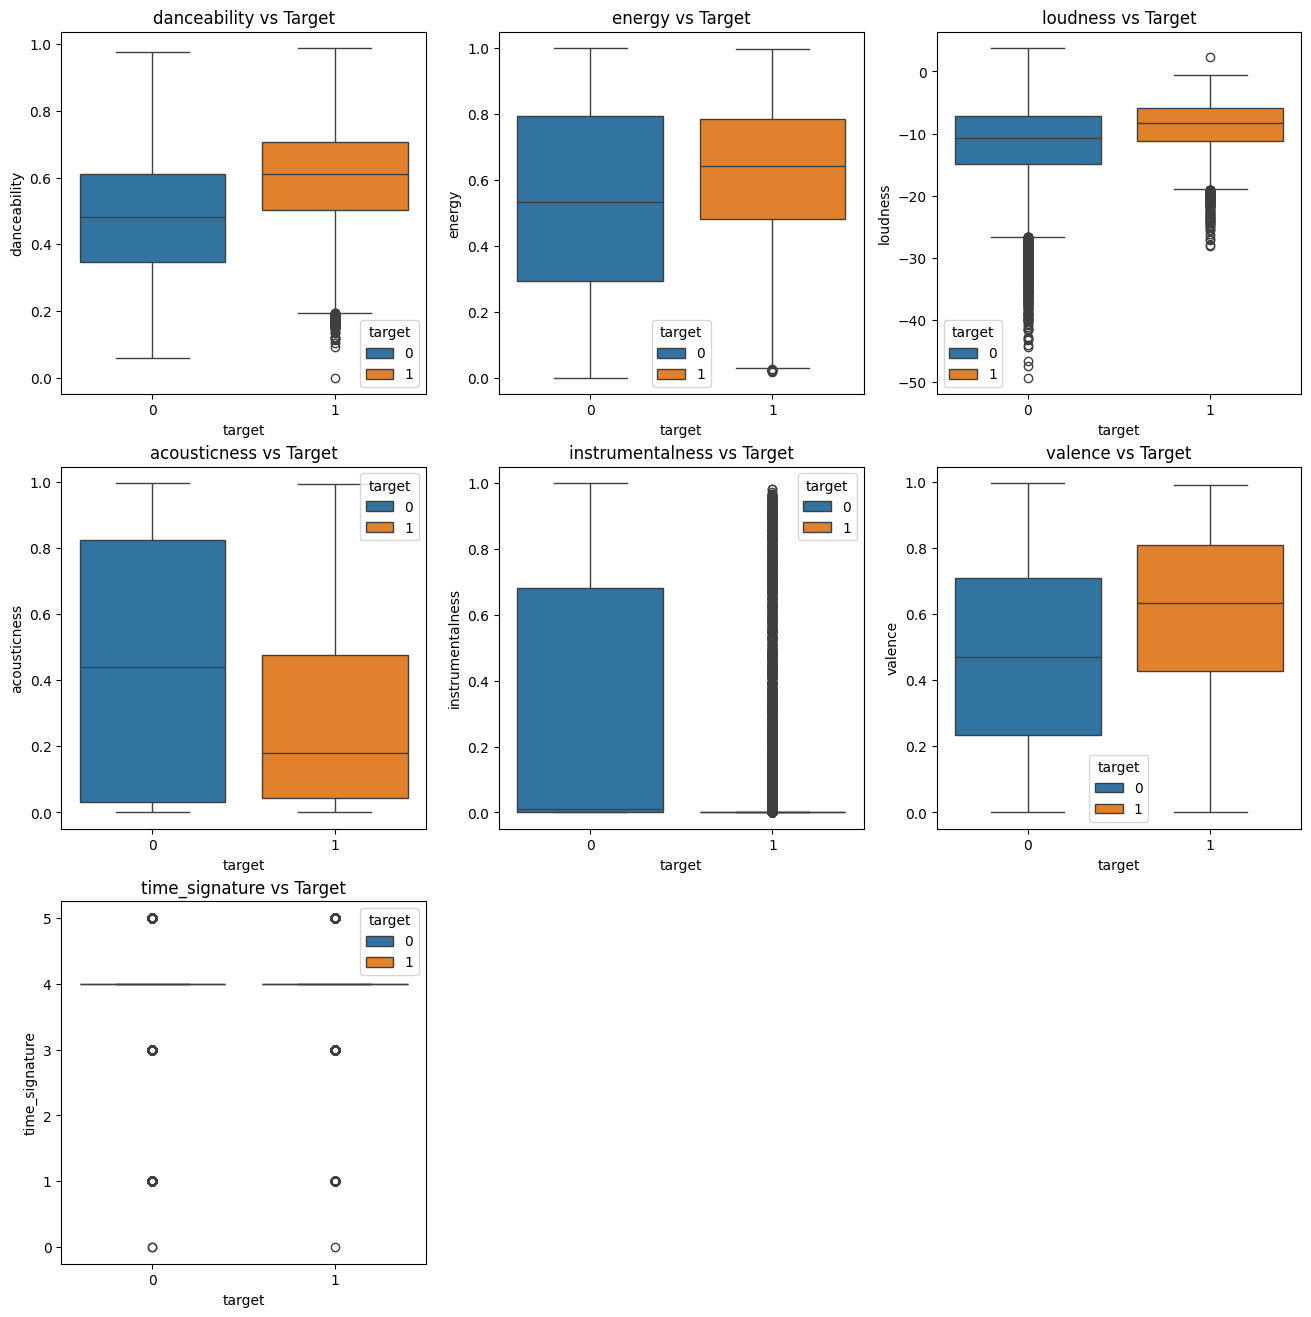

In [59]:
#features with the higher correlation with the target
columns_corr = ['danceability', 'energy', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'time_signature']

# Custom palette with blue and orange
custom_palette = ['#1f77b4', '#ff7f0e']  # Blue and orange
plt.figure(figsize=(16,16))
for i, column in enumerate(columns_corr):
    plt.subplot(3,3,i+1)
    sns.boxplot(x='target', y=column, data=data, hue='target',  palette=custom_palette)
    plt.title(f'{column} vs Target')

### General distribution of some features ###

<Axes: xlabel='target', ylabel='Count'>

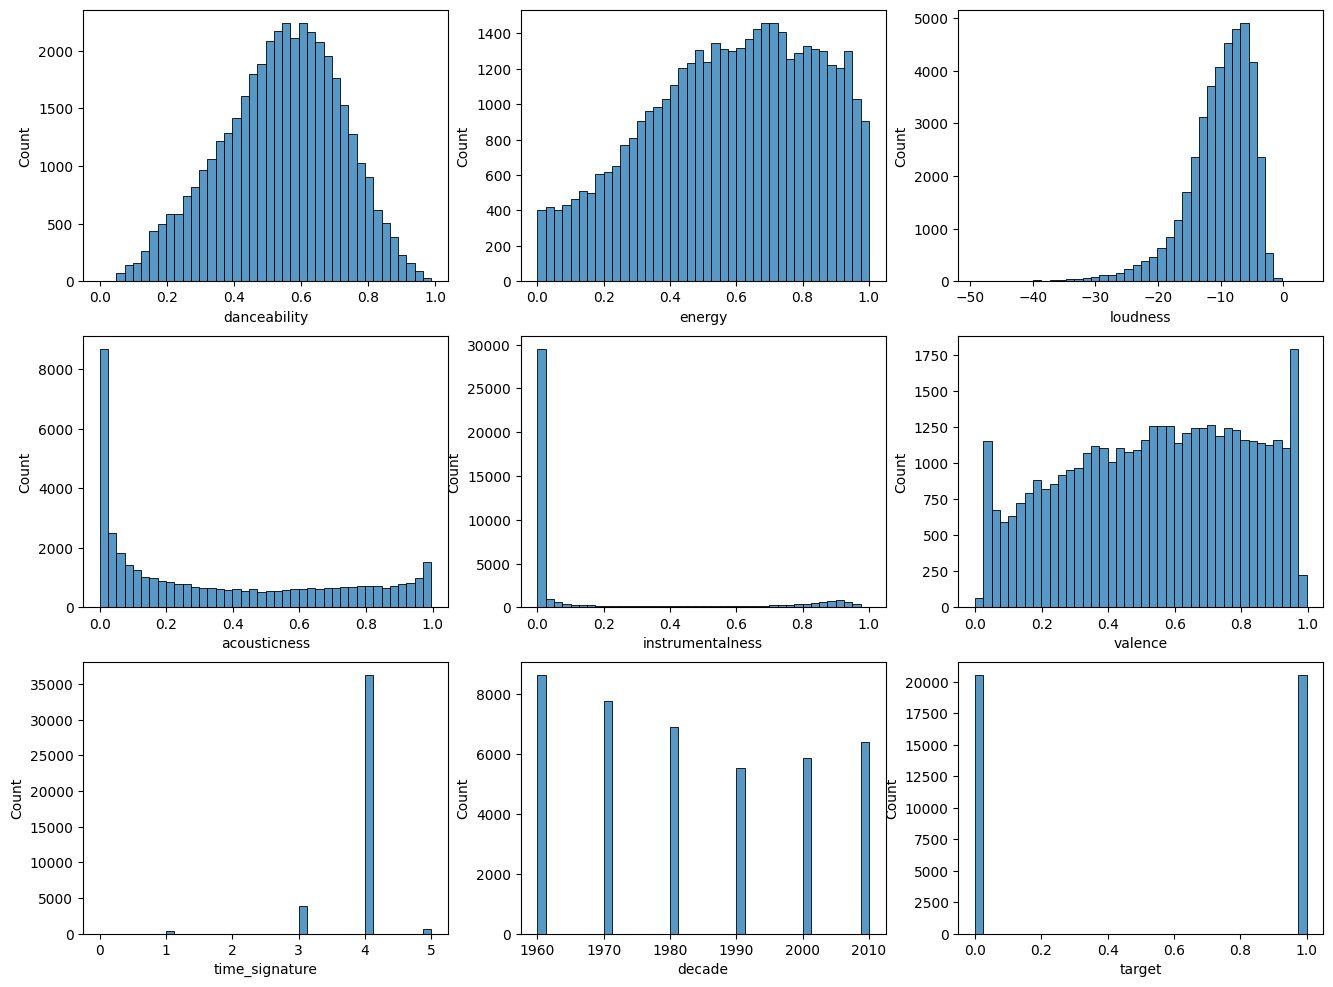

In [60]:
plt.figure(figsize=(16,12))
plt.subplot(3,3,1)
sns.histplot(data['danceability'], bins=40)

plt.subplot(3,3,2)
sns.histplot(data['energy'], bins=40)

plt.subplot(3,3,3)
sns.histplot(data['loudness'], bins=40)

plt.subplot(3,3,4)
sns.histplot(data['acousticness'], bins=40)

plt.subplot(3,3,5)
sns.histplot(data['instrumentalness'], bins=40)

plt.subplot(3,3,6)
sns.histplot(data['valence'], bins=40)

plt.subplot(3,3,7)
sns.histplot(data['time_signature'], bins=40)

plt.subplot(3,3,8)
sns.histplot(data['decade'], bins=40)

plt.subplot(3,3,9)
sns.histplot(data['target'], bins=40)



### Distribution of the target ###

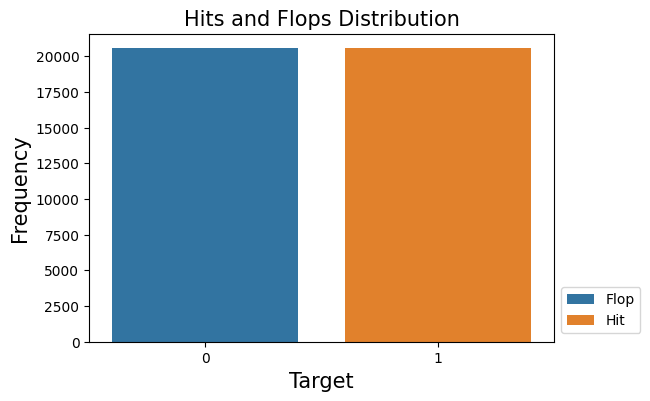

In [61]:
# Plotting the count plot
plt.figure(figsize=(6, 4))
f1 = sns.countplot(data=data, x='target', hue='target', palette=custom_palette)  # Apply custom palette
f1.set_xlabel("Target", fontsize=15)  # Set x-axis label
f1.set_ylabel("Frequency", fontsize=15)  # Set y-axis label
f1.set_title("Hits and Flops Distribution", fontsize=15)  # Set title for subplot

# Set custom labels for the legend
handles, labels = f1.get_legend_handles_labels()
f1.legend(handles, ['Flop', 'Hit'], bbox_to_anchor=(1, 0.2))

plt.show()

### Ratio between the two target classes

In [62]:
# the last plot shows a well-balanced data distribution. To verify it:
data.target.value_counts(normalize=True)

target
0    0.5
1    0.5
Name: proportion, dtype: float64